In this tutorial, we will learn about the **CMA-ES** which stands for **Covariance Matrix Adaptation - Evolution Strategy**. 

Let us assume an equation, <br><center>**z = (x * x) + (y * y) - 10**<center><br>. 
    
Our goal is find the optimum value of 'x' and 'y' such that the values when substitued in the above equation will give us the minimum value for the equation. We have many methods to obtain the values for 'x' and 'y' which gives us the minimum value for the equation. We can use the principle of **Gradients** and find the values for 'x' and 'y' which gives us the minimum value for the above equation. But what if we cannot calculate the gradients for an equation? Calculating gradients for high order equations could sometimes be too complex and error prone. In some cases, gradient information is also not available. So, how can one find the optimal minimum value in such circumstances ? 

**Evolution Algorithms** helps us to find the optimal minumum in case gradients are not available or too complex to calculate. How does the Evolution algorithm work ? They follow a very simple procedure as described below:

**Step 1:** The algorithm provides us with a certain set of **Candidate Solution**. <br>
**Step 2:** The candidate solutions provided are evaluted to see how well they perform. Here, we calculate the **Fitness** of these candidate solutions. <br>
**Step 3:** We inform the algorithm about the obtained fitness for the candidates provided. <br>
**Step 4:** The algorithm provides a new set of **Candidate Solution** which is again evaluated. <br> 

The above steps (1-4) are repeated until we are satisfied with our results. 

**Stop Criteria** : We hae different criterias to stop the execution of our evolution algorithm. Some of them are stated below:
Criteria 1: We can run the algorithm for a fixed number of iterations (such as 500, 1000, 1500 etc). 
Criteria 2: We can stop the algorithm once we have achieved a particular fitness score. 
Criteria 3: We can run the algorithm for a fixed duration (say 24 hours or 48 hours). 

**Nevergrad** is a python package developed by **Facebook** which provides us with an **ask-tell interface** and offers us several built in evolution algorithms such as CMA-ES.

In [15]:
# Import the necessary packages
import nevergrad
import matplotlib.pyplot as plt
from nevergrad import instrumentation
from nevergrad.optimization import optimizerlib

In [16]:
class ParameterTuner(object):
    def __init__(self, parameters_dict: dict, algorithm: str):
        self.parameters = []
        for (key, value) in parameters_dict.items():
            # Encapsulates the parameters to be optimized in the variable param
            # The parameters are bounded by a 'low' and 'high' value. Our optimum values should lie within this.
            # If we do not know the exact range of our parameters, do not bound them. 
            param = nevergrad.instrumentation.variables.Array(1).asscalar(value['type']).bounded(a_min=value['low'],
                                                                                                 a_max=value['high'])
            
            self.parameters.append(param)
            
        # The instrum variable is provided to the optimization library. The instrum contains details of our parameters
        instrum = nevergrad.instrumentation.Instrumentation(*self.parameters)
        
        self.optimizer = nevergrad.optimization.registry[algorithm](instrumentation=instrum)
        
        # Information about the number of times candidates have been suggested
        self.number_of_candidates_asked = 0 
        
        # Stores information of the candidate suggested
        self.candidate_asked = None
        
    # This function returns a candidate solution whose fitness needs to be evaluated
    def ask(self):
        self.number_of_candidates_asked += 1
        
        # Ask the algorithm for candidate
        candidate = self.optimizer.ask()
        
        # Store the information of the candidate suggested
        self.candidate_asked = candidate
        
        return self.number_of_candidates_asked
    
    # This function informs the algorithm about the fitness of a particular candidate
    def tell(self, i:int, fitness: float):
        # Tell the algorithm about the fitness of the candidate
        self.optimizer.tell(self.candidate_asked, fitness)

We shall now instantiate the **ParameterTuner** class and specify the range of our parameters 'x' and 'y' in the form of a dictionary.

In [17]:
# List out the details of our parameters here
parameter_dictionary = {
    'x': {'low': 0.0, 'high': 10.0, 'type':float},
    'y': {'low': -10.0, 'high': 15.0, 'type':float}
    }

# Instantiate the class
tuner = ParameterTuner(parameter_dictionary, 'CMA')

We shall now run the algorithm for a fixed number of iterations, say 200 since the equation is very simple. We need to also define an **Objective Function** which will help us to evaluate the fitness of the candidates in each iteration

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=nan, Wed Sep  9 14:42:39 2020)
Best Recommended values are =  Candidate(args=(0.17944506846866304, 0.0017951622530603117), kwargs={})


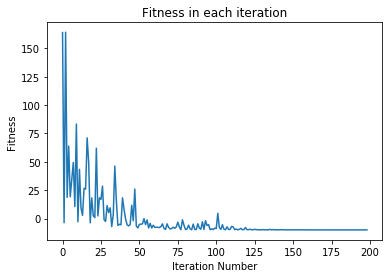

In [18]:
def objective_function(x, y):
    return (x*x) + (y*y) - 10

Fitness = []
for itr in range(1, 200):
    # Ask for parameters
    candidate_id = tuner.ask()
    
    # Calculate the fitness 
    fitness = objective_function(*tuner.candidate_asked.args)
    
    # Store the fitness in each iteration to view performance
    Fitness.append(fitness)
    
    # Inform the fitness
    tuner.tell(candidate_id, fitness)
    
print("Best Recommended values are = ", tuner.optimizer.provide_recommendation())
plt.title("Fitness in each iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Fitness")
plt.plot(Fitness)
plt.show()

As seen in the above plot, we can see how the fitness value converges to the optimal minimum. The results also show that the best candidates for our equation to reach its optimal minimum are '0.00475' and '-0.0024'.